# Mood Experiments

Experiments based on following papers: [Eldar et al., 2016](https://www.sciencedirect.com/science/article/pii/S1364661315001746), and [Bennett et al., 2022](https://psycnet.apa.org/record/2021-84803-001).

In [1]:
# Uncomment below lines and run this cell to install neuronav and requirements for colab.

#!git clone https://github.com/awjuliani/neuro-nav
#!pip install ./neuro-nav[experiments_remote]

In [2]:
from neuronav.envs.grid_env import GridEnv, GridSize
from neuronav.agents.td_agents import MoodQ
from neuronav.envs.grid_templates import GridTemplate
from neuronav.utils import run_episode
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'

Initial environment configuration:


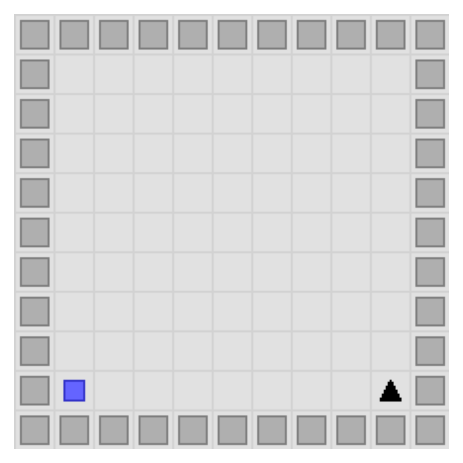

Environment configuration after half of the episodes:


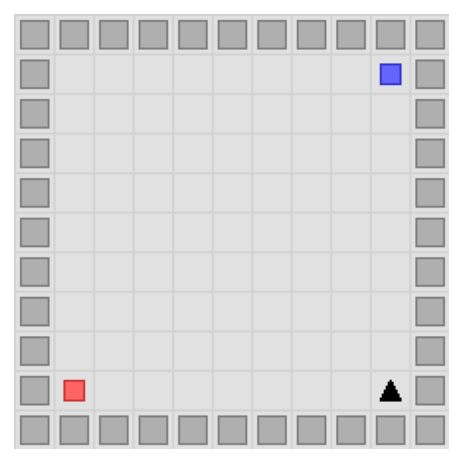

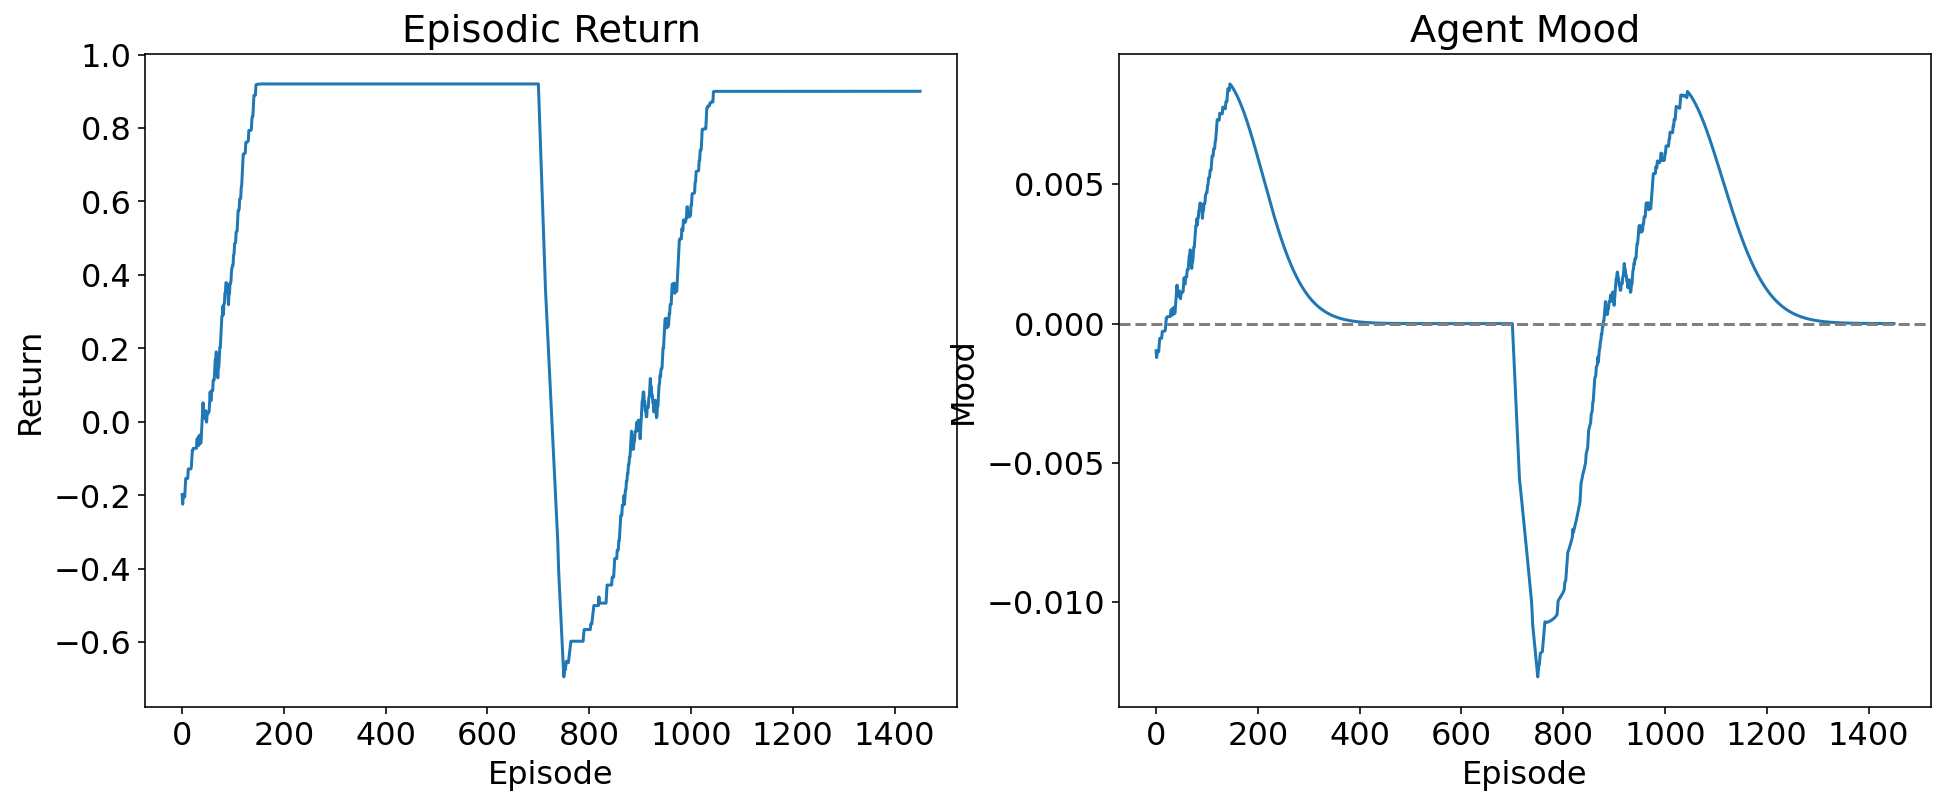

In [9]:
env = GridEnv(size=GridSize.small, template=GridTemplate.empty)
objects = {"rewards": {(env.grid_size - 2, 1): 1}}
obs = env.reset(objects=objects)
print("Initial environment configuration:")
env.render()


num_episodes = 1500
num_steps = 50
lr = 5e-2

agent = MoodQ(
    env.state_size,
    env.action_space.n,
    lr=lr,
    poltype="softmax",
    beta=1e3,
    lr_neg=lr,
    mood_lr=1e-2,
    mood_factor=0,
)

returns = []
moods = []
second_objects = {"rewards": {(env.grid_size - 2, 1): -1, (1, env.grid_size - 2): 1}}

for i in range(num_episodes):
    if i == num_episodes // 2:
        objects = second_objects
        env.reset(objects=objects)
        print("Environment configuration after half of the episodes:")
        env.render()
    agent, steps, ep_return = run_episode(
        env, agent, num_steps, objects=objects, update_agent=True, time_penalty=-0.01
    )
    moods.append(agent.mood)
    returns.append(ep_return)

# set larger font for plots
plt.rcParams.update({"font.size": 16})

factor = 50
returns = np.convolve(returns, np.ones((factor,)) / factor, mode="valid")
moods = np.convolve(moods, np.ones((factor,)) / factor, mode="valid")

# create a figure with two axes next to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# plot returns
ax1.plot(returns)
ax1.set_title("Episodic Return")
# label x axis
ax1.set_xlabel("Episode")
# label y axis
ax1.set_ylabel("Return")

# plot moods
ax2.plot(moods)
ax2.set_title("Agent Mood")
# add dotted line at 0
ax2.axhline(y=0, color="grey", linestyle="--")
# label x axis
ax2.set_xlabel("Episode")
# label y axis
ax2.set_ylabel("Mood")

plt.show()